In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

import sys
sys.path.append("..")

### Load data

In [2]:
import sklearn
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(0)
NUM_CLASSES = 2
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.4)

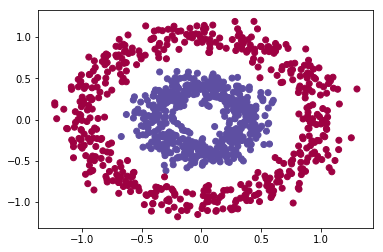

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

ohe = OneHotEncoder(categories=[range(NUM_CLASSES)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

### Fit model

In [5]:
%autoreload

from src.model import DNN
from src.utils.layers.dense import Dense
from src.utils import activation_fns
from src.utils.optimizers import Adam

dnn = DNN([
    Dense(7, activation_fn=activation_fns.ReLU),
    Dense(4, activation_fn=activation_fns.ReLU),
    Dense(NUM_CLASSES, activation_fn=activation_fns.softmax)
], Adam(0.001), 1000, mini_batch_size=64)

costs, errors = dnn.fit(X_train, Y_train, gradient_checking=True)

In [6]:
errors

[(99, 'OK', 3.9069187211101355e-11),
 (199, 'OK', 4.5331639984516676e-10),
 (299, 'OK', 2.3581725229671755e-10),
 (399, 'OK', 1.5032942101830015e-09),
 (499, 'OK', 3.681565910155906e-10),
 (599, 'OK', 1.8208322894911496e-09),
 (699, 'OK', 7.402427218094959e-10),
 (799, 'OK', 2.4597550375845876e-09),
 (899, 'OK', 3.852784243724745e-09),
 (999, 'OK', 2.157649539319647e-09)]

### Accuracy

In [7]:
from sklearn.metrics import accuracy_score
decode = lambda x: np.argmax(x, axis=1)

y_train_pred = decode(dnn.predict(X_train))
print("Train:", accuracy_score(y_train, y_train_pred))
y_test_pred = decode(dnn.predict(X_test))
print("Test:", accuracy_score(y_test, y_test_pred))

Train: 1.0
Test: 1.0


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[45,  0],
       [ 0, 55]])

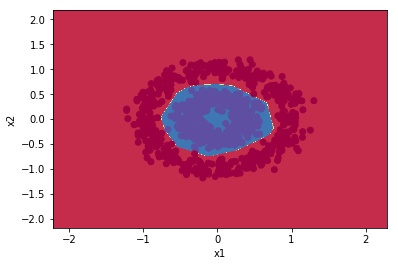

In [9]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.show()
    
plot_decision_boundary(lambda x: decode(dnn.predict(x)), X_train, y_train)

### Cost

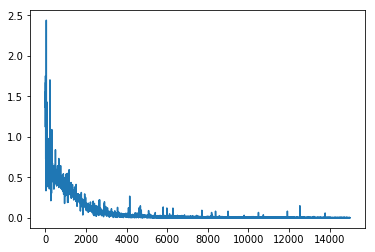

In [10]:
plt.plot(costs)
plt.show()

In [11]:
print("mean:   {0}".format(np.mean(costs)))
print("std:    {0}".format(np.std(costs)))
print("min:    {0}".format(np.min(costs)))
print("max:    {0}".format(np.max(costs)))
print("argmin: {0}".format(np.argmin(costs)))
print("argmax: {0}".format(np.argmax(costs)))

mean:   0.0698562790503991
std:    0.16117902491462582
min:    2.71114936780292e-09
max:    2.438392379666603
argmin: 13319
argmax: 44
